#### Import Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/sobuj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sobuj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Load the data

In [36]:
df = pd.read_csv("dataset/Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [37]:
# drop unnecessary columns
df = df.drop(['ID', 'Resume_html'], axis=1)
# rename columns
df = df.rename(columns={'Resume_str': 'Resume'})
# move category column to the front
df = df[['Category', 'Resume']]
df.head()

,Category,Resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...


### Data Exploration and Preprocessing

#### Checking length of the list of resumes

In [38]:
df.shape

(2484, 2)

> *There are 2484 resumes in the dataset.*

#### Checking the info for the columns

In [39]:
# check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Resume    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [40]:
# check for null values
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [41]:
df.describe()

,Category,Resume
count,2484,2484
unique,24,2482
top,INFORMATION-TECHNOLOGY,STOREKEEPER II Professional Sum...
freq,120,2


In [42]:
# check unique categories
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [43]:
print("Total number of available jobs:", df.Category.nunique())

Total number of available jobs: 24


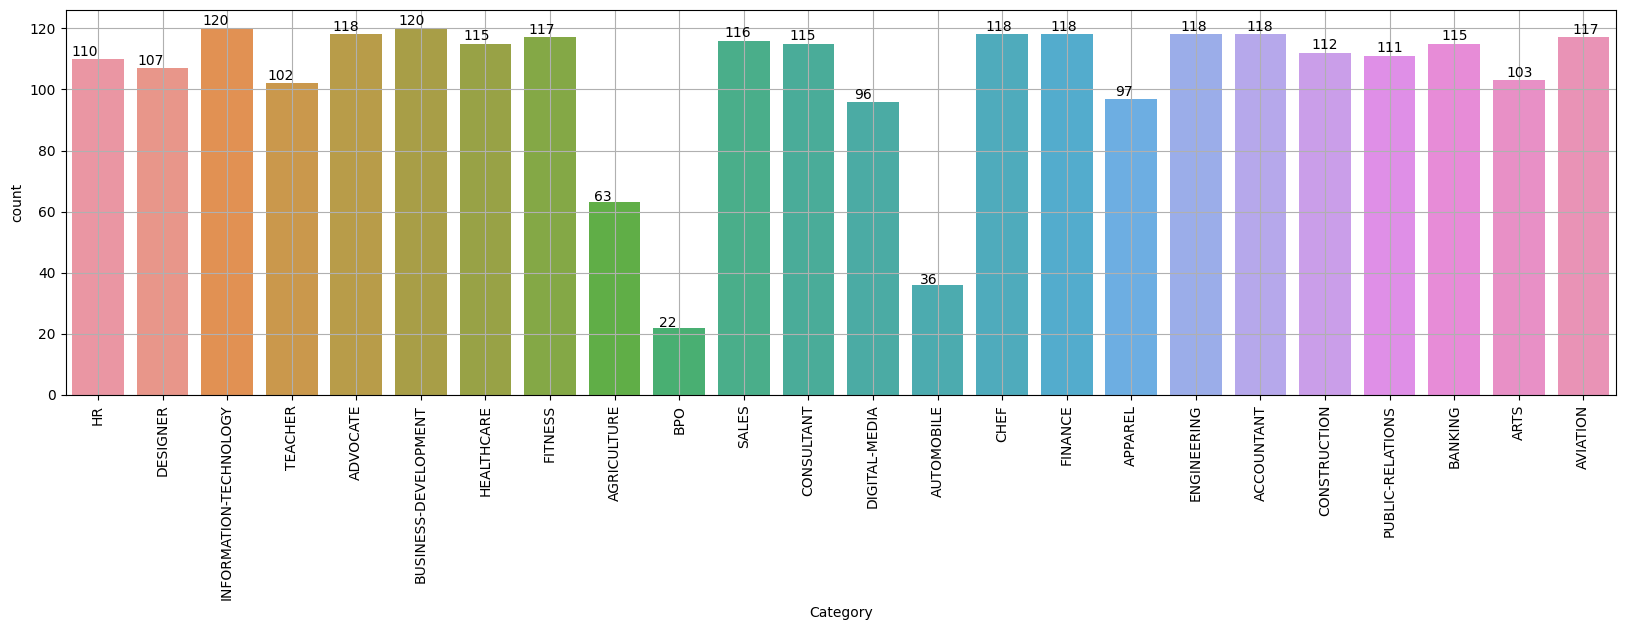

In [44]:
# showing the distribution of the categories
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data=df)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() * 1.01, p.get_height() * 1.01))

plt.grid()
plt.show()

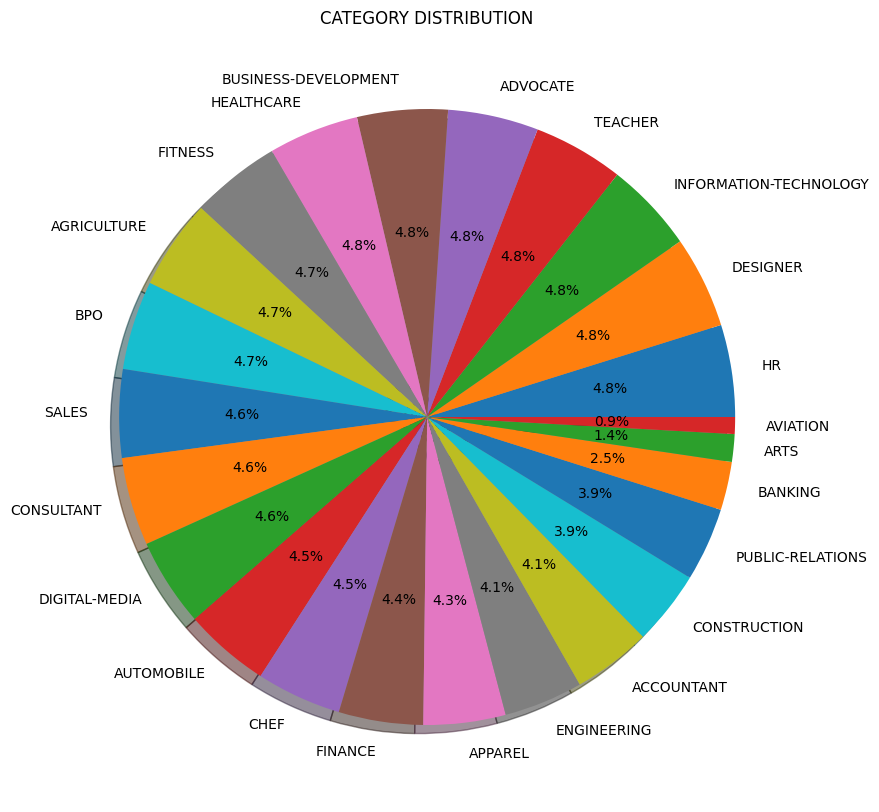

In [45]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

#### Preprocessing

In [46]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
df.head()

,Category,Resume,cleaned_resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",HR SPECIALIST US HR OPERATIONS Summary Versat...
2,HR,HR DIRECTOR Summary Over 2...,HR DIRECTOR Summary Over 20 years experience ...
3,HR,HR SPECIALIST Summary Dedica...,HR SPECIALIST Summary Dedicated Driven and Dy...
4,HR,HR MANAGER Skill Highlights ...,HR MANAGER Skill Highlights HR SKILLS HR Depa...


#### Most common words from Resume

In [47]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(10)
print(mostcommon)

[('State', 15351), ('City', 14960), ('Company', 11932), ('Name', 11653), ('A', 7200), ('management', 7011), ('customer', 6156), ('sales', 5645), ('new', 5518), ('Management', 5085)]


#### Encoding Target Variable

In [48]:
labels_dict = {}

for idx, label in enumerate(df.Category.unique()):
    labels_dict[label] = idx

labels_dict

{'HR': 0,
 'DESIGNER': 1,
 'INFORMATION-TECHNOLOGY': 2,
 'TEACHER': 3,
 'ADVOCATE': 4,
 'BUSINESS-DEVELOPMENT': 5,
 'HEALTHCARE': 6,
 'FITNESS': 7,
 'AGRICULTURE': 8,
 'BPO': 9,
 'SALES': 10,
 'CONSULTANT': 11,
 'DIGITAL-MEDIA': 12,
 'AUTOMOBILE': 13,
 'CHEF': 14,
 'FINANCE': 15,
 'APPAREL': 16,
 'ENGINEERING': 17,
 'ACCOUNTANT': 18,
 'CONSTRUCTION': 19,
 'PUBLIC-RELATIONS': 20,
 'BANKING': 21,
 'ARTS': 22,
 'AVIATION': 23}

In [49]:
df.Category = df.Category.apply(func=lambda x: labels_dict[x])
df.Category = df.Category.astype(np.int64)

### Building model